In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [ ]:
# Loading MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Dim x_train:", x_train.shape)
print("Dim y_train:", y_train.shape)
print("Dim x_test:", x_test.shape)
print("Dim y_test:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Dim x_train: (60000, 28, 28)
Dim y_train: (60000,)
Dim x_test: (10000, 28, 28)
Dim y_test: (10000,)


In [ ]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
x_train_n = x_train / 255 # normalization
x_test_n = x_test / 255
x_train_n[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
x_train_r = tf.reshape(x_train_n, (x_train_n.shape[0], -1)) # reshape to 1-D
x_test_r = tf.reshape(x_test_n, (x_test_n.shape[0], -1))

In [ ]:
print(x_train_n.shape)
print(x_train_r.shape)

(60000, 28, 28)
(60000, 784)


## Dense AE

In [ ]:
def deep_ae(dim_inputs, encoder_units, decoder_units):
  inputs =  tf.keras.layers.Input(shape=(dim_inputs,))

  encoder = tf.keras.layers.Dense(units=encoder_units[0], activation='relu', name='enc_0')(inputs)
  encoder = tf.keras.layers.Dense(units=encoder_units[1], activation='relu', name='enc_1')(encoder)
  encoder = tf.keras.layers.Dense(units=encoder_units[2], activation='relu', name='enc_2')(encoder)

  bottleneck = tf.keras.layers.Dense(units=encoder_units[2], activation='relu', name='bottleneck')(encoder)

  decoder = tf.keras.layers.Dense(units=decoder_units[0], activation='relu', name='dec_0')(bottleneck)
  decoder = tf.keras.layers.Dense(units=decoder_units[1], activation='relu', name='dec_1')(decoder)
  decoder = tf.keras.layers.Dense(units=decoder_units[2], activation='sigmoid', name='dec_2')(decoder)

  model = tf.keras.Model(inputs=inputs, outputs=decoder)
  return model

In [ ]:
# (128,64,32) -> (64,128,784)
dae_128 = deep_ae(x_train_r.shape[1], [128,64,32], [64,128,x_train_r.shape[1]])
# binary to check the values of each pixel, which are between 0-1 due to normalization, that's why we use sigmoid activation and binary_crossentropy loss (as segmentation networks)
dae_128.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# (64,32,16) -> (32,64,784)
dae_64 = deep_ae(x_train_r.shape[1], [64,32,16], [32,64,x_train_r.shape[1]])
dae_64.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

## Train of the models

In [ ]:
dae_128.fit(x_train_r, x_train_r, epochs=30, batch_size=16)

Epoch 1/30
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1516
Epoch 2/30
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1130
Epoch 3/30
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1050
Epoch 4/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.1010
Epoch 5/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0980
Epoch 6/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0954
Epoch 7/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0940
Epoch 8/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0929
Epoch 9/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0919
Epoch 10/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0911
Epoch 11/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0905
Epoch 12/30
3750/3750 [==============================] - 14s 4ms/step - lo

In [ ]:
dae_64.fit(x_train_r, x_train_r, epochs=30, batch_size=16)

Epoch 1/30
3750/3750 [==============================] - 17s 4ms/step - loss: 0.1777
Epoch 2/30
3750/3750 [==============================] - 15s 4ms/step - loss: 0.1386
Epoch 3/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1301
Epoch 4/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1261
Epoch 5/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1228
Epoch 6/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1208
Epoch 7/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1195
Epoch 8/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1178
Epoch 9/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1162
Epoch 10/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1154
Epoch 11/30
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1147
Epoch 12/30
3750/3750 [==============================] - 14s 4ms/step - lo

In [ ]:
dae_128.save('dae_128.h5')
dae_64.save('dae_64.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Models test

In [ ]:
dm_128 = tf.keras.models.load_model('dae_128.h5')
dm_64 = tf.keras.models.load_model('dae_64.h5')

In [ ]:
sample_index = np.array(([8730, 3281, 2994, 1599, 5450]))
sample_index

array([8730, 3281, 2994, 1599, 5450])

In [ ]:
def inference(model, sample_index, x_set):

  fig, axs = plt.subplots(2, len(sample_index), figsize=(12,6))

  for i,index in enumerate(sample_index):
    pred = model.predict(tf.expand_dims(x_set[index],axis=0), verbose=0)
    pred = tf.reshape(pred, (28,28))
    axs[0,i].imshow(tf.reshape(x_set[index], (28,28)),cmap='gray')
    axs[0,i].axis('off')
    axs[1,i].imshow(pred, cmap='gray')
    axs[1,i].axis('off')

  ax_top = fig.add_subplot(2, 1, 1)
  ax_top.axis('off')
  ax_top.set_title("Original images")

  ax_top = fig.add_subplot(2, 1, 2)
  ax_top.axis('off')
  ax_top.set_title("Predictions")


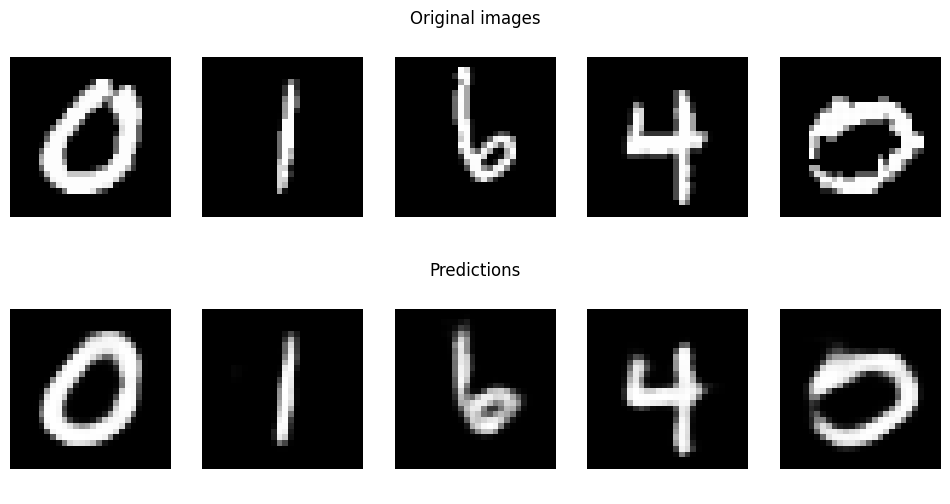

In [ ]:
inference(dm_128, sample_index, x_test_r)

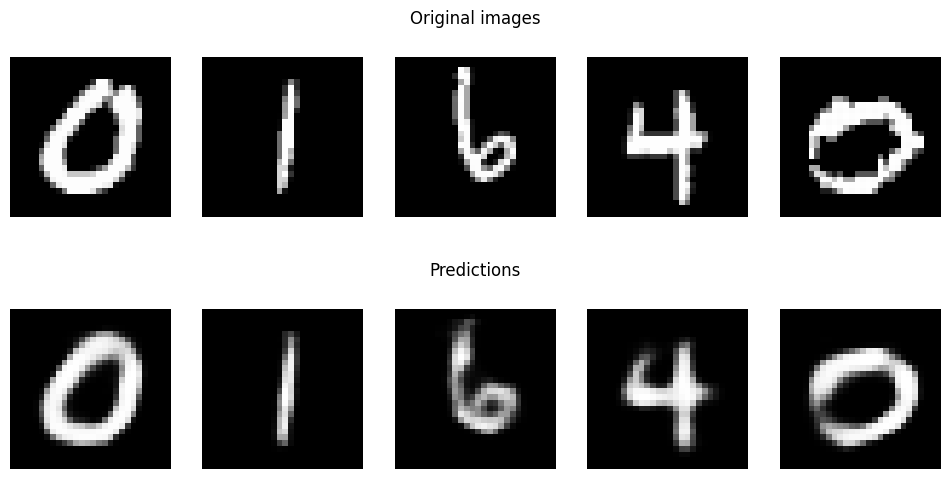

In [ ]:
inference(dm_64, sample_index, x_test_r)